In [5]:
import json
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 01 load data and parse data

In [6]:
# load json
with open('./clean_data_1.json') as datafile:
    data1 = json.load(datafile)

In [7]:
# split each row
data_list = [row.split(',') for row in data1['data']]

In [8]:
# get data into a dataframe
df = pd.DataFrame.from_records(data_list)
df.rename(columns={df.columns[4]:'ts_receive',df.columns[5]:'apmac',df.columns[9]:'people'},inplace=True)
df.head()

,0,1,2,3,ts_receive,apmac,6,7,8,people,...,29,30,31,32,33,34,35,36,37,38
0,tongji,1.0,002,1.1,1526441081726,e4956e418d91,93,1526441059297,55;69;79;80;81;82;83;84;85,286c079f8b17,...,10327,778284,4,09,19,P1,,,上海市,
1,tongji,1.0,002,1.1,1526441081726,e4956e418d91,93,1526441059297,68;69;71;72;76;77;79;82;78;73;74;75;80;81;83,206be7815f65,...,10327,778284,4,09,19,P1,,,上海市,
2,tongji,1.0,002,1.1,1526441081726,e4956e418d91,93,1526441059297,85;86;83;84;88;81;82;87;89;90;91;92;60,8ca6df73f0f3,...,10327,778284,4,09,19,P1,,,上海市,
3,tongji,1.0,002,1.1,1526441081726,e4956e418d91,93,1526441059297,71;72;73;75;82,64cc2e80101e,...,10327,778284,4,09,19,P1,,,上海市,
4,tongji,1.0,002,1.1,1526441081726,e4956e418d91,93,1526441059297,83;79;80;81;82;77;78;84;76;86;69;70;71;72;73;7...,b0958e60c635,...,10327,778284,4,09,19,P1,,,上海市,


# 02 explore the data by vis

## 1) explore each attribute of the data

In [9]:
sorted(df['apmac'].unique())

[u'0003b9b11b68',
 u'e4956e418d4c',
 u'e4956e418d7c',
 u'e4956e418d91',
 u'e4956e418d92',
 u'e4956e418da7',
 u'e4956e418dda']

In [10]:
sorted(df['ts_receive'].unique())

[u'1526441081726',
 u'1526441085533',
 u'1526441089552',
 u'1526441091535',
 u'1526441091537',
 u'1526441094538',
 u'1526441094940']

From above, the original value of time and apmac is hard to recognize.

Let's get a copy of data and replace their values with easier-recognized symbol.

In [11]:
frame = df.copy()
frame['ts_receive'].replace({'1526441091537':'t1','1526441094538':'t2','1526441089552':'t3','1526441085533':'t4','1526441091535':'t5','1526441081726':'t6','1526441094940':'t7'},inplace=True)
frame['apmac'].replace({'e4956e418d92':'a','e4956e418da7':'b','e4956e418d4c':'c','e4956e418dda':'d','0003b9b11b68':'e','e4956e418d91':'f','e4956e418d7c':'g'},inplace=True)
frame.head()

,0,1,2,3,ts_receive,apmac,6,7,8,people,...,29,30,31,32,33,34,35,36,37,38
0,tongji,1.0,002,1.1,t6,f,93,1526441059297,55;69;79;80;81;82;83;84;85,286c079f8b17,...,10327,778284,4,09,19,P1,,,上海市,
1,tongji,1.0,002,1.1,t6,f,93,1526441059297,68;69;71;72;76;77;79;82;78;73;74;75;80;81;83,206be7815f65,...,10327,778284,4,09,19,P1,,,上海市,
2,tongji,1.0,002,1.1,t6,f,93,1526441059297,85;86;83;84;88;81;82;87;89;90;91;92;60,8ca6df73f0f3,...,10327,778284,4,09,19,P1,,,上海市,
3,tongji,1.0,002,1.1,t6,f,93,1526441059297,71;72;73;75;82,64cc2e80101e,...,10327,778284,4,09,19,P1,,,上海市,
4,tongji,1.0,002,1.1,t6,f,93,1526441059297,83;79;80;81;82;77;78;84;76;86;69;70;71;72;73;7...,b0958e60c635,...,10327,778284,4,09,19,P1,,,上海市,


Now, the value of apmac and time look like this:

In [12]:
sorted(frame['apmac'].unique())

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [13]:
sorted(frame['ts_receive'].unique())

['t1', 't2', 't3', 't4', 't5', 't6', 't7']

Check the number of records for each people.

In [14]:
frame['people'].value_counts()

1475908663ee    4
286c079f8b17    4
64cc2e80101e    3
0007a8b390dc    3
30fc68904513    3
ec26ca11d060    3
e4f4c60c969a    2
206be7815f65    2
dc2a1423ac62    2
98bc5770bb38    2
b808d77ccc84    2
000000000000    2
34bdf9147270    2
90b686d8ab47    1
38a4ed1e3f80    1
b8763f8fa9bf    1
6409802b52c2    1
acc1ee72b4c4    1
acd074254a41    1
fc1a113d4834    1
f8983a0023e1    1
e89eb41693ab    1
b0958eea2ac1    1
28faa02e8ede    1
e4f3f5a51758    1
e447902ac2a9    1
14a51a247de2    1
6c3e6db90fcd    1
e005c5b48dc0    1
0c1dafdbd79f    1
               ..
c83dd4a19615    1
70f087b18376    1
f429815fd68e    1
0008226044fc    1
38295ac71e13    1
c83a35fbd948    1
000aeba35a03    1
04e676452150    1
d8004ddc6cef    1
4045dad74011    1
581f28169145    1
c485085e7676    1
50bd5f4805e4    1
5800e3dabbfd    1
38a4edfa2b3b    1
28cfe9d5c889    1
00f4b9eb1ae1    1
f80113313bbc    1
9492bceb8b49    1
541379d05d4f    1
e4f3f543f946    1
30c3d9bada66    1
e02cb2ad6294    1
24099516d9e3    1
f01b6c3f53

The reseult implys sparse records for each people.

## 2) vis the livingline

Since there are so many people with sparse data, a good strategy to explore the living line is to sample the people and only visualize those being sampled.

In [30]:
# fix sample: representative samples
# sample_people = ['1475908663ee', '286c079f8b17', '30fc68904513', '206be7815f65'] # with 4,4,3,2 records respectively

# top-records sample
sample_people = frame['people'].value_counts()[:10].index.tolist()

# random sample
# sample_people = frame['people'].sample(n=5).tolist()

Now visualize their living line

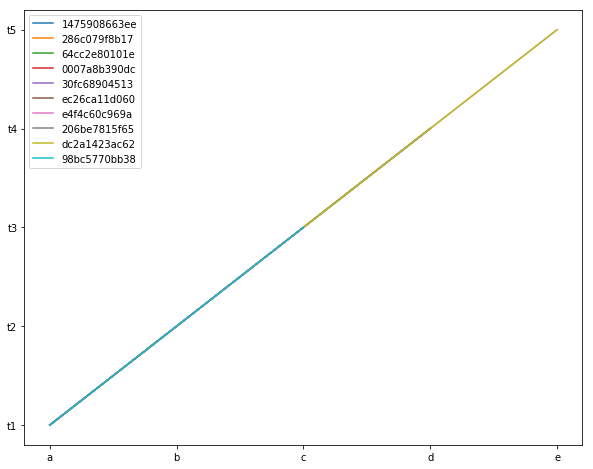

In [34]:
# plotting using matplotlib
plt.figure(figsize=(10,8))
ax = plt.gca()
## set x, y tick labels
ax.set_xticklabels(sorted(frame['apmac'].unique()))
ax.set_yticklabels(sorted(frame['ts_receive'].unique()))
## draw the livingline for each people
for person in sample_people:
    plot_data = frame[frame['people'] == person].sort_values(by='ts_receive')
    x = plot_data['apmac'].tolist()
    y = plot_data['ts_receive'].tolist()
    ax.plot(x, y)
## set legend
ax.legend(sample_people)

Conclusion: From the top figure, we can see there is overlaping living line.

To aparently show the overlapping area, I will change a visualization strategy using transparency.

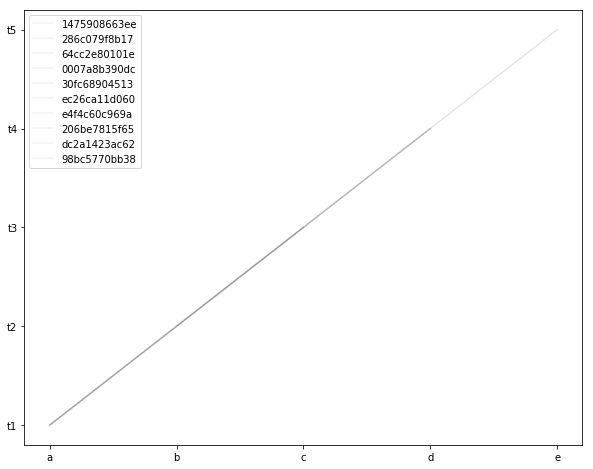

In [150]:
# plotting using matplotlib
plt.figure(figsize=(10,8))
ax = plt.gca()
## set x, y tick labels
ax.set_xticklabels(sorted(frame['apmac'].unique()))
ax.set_yticklabels(sorted(frame['ts_receive'].unique()))
## set legend
ax.legend(sample_people)
## draw the livingline for each people
for person in sample_people:
    plot_data = frame[frame['people'] == person].sort_values(by='ts_receive')
    x = plot_data['apmac'].tolist()
    y = plot_data['ts_receive'].tolist()
    ax.plot(x, y, c='black', alpha=0.05)
## set legend
ax.legend(sample_people)

The darker region the overlaping area.

In [4]:
map()

TypeError: map() requires at least two args